# Analise de corridas

## START OF RACE ANALYSIS

1. Instalação das bibliotecas;
    * Pandas, numpy, seaborn e plotly
2. Importação das bibliotecas;
    * Pandas, numpy, seaborn e plotly
3. Importando os dados;
    * Keggle - nrc_ride_bookings
    * Total de colunas - 21
    * Total de linhas - 150000

In [1]:
#%pip install pandas numpy seaborn
#%pip install plotly

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_csv(r'C:\Users\User\Desktop\Pasta de projeto Kaggle\archive\Arquivo original\ncr_ride_bookings.csv')

dados.head()

Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...                                NaN                       NaN   
1  ...                                NaN                       NaN   
2  ...                                NaN                       NaN   
3  ...                                NaN                       NaN   
4  ...                                NaN                       NaN   

   Driver Cancellation Reason Incomplete Rides  Incomplete Rides Reason  \
0                         NaN              NaN                      NaN   
1                         NaN              1.0        Vehicle Breakdown   
2                         NaN              NaN                      NaN   
3                         NaN              NaN                      NaN   
4                         NaN              NaN                      NaN   

  Booking Value  Ride Distance  Driver Ratings  Customer Rating  \
0           NaN            NaN             NaN              NaN   
1         237.0           5.73             NaN              NaN   
2         627.0          13.58             4.9              4.9   
3         416.0          34.02             4.6              5.0   
4         737.0          48.21             4.1              4.3   

   Payment Method  
0             NaN  
1             UPI  
2      Debit Card  
3             UPI  
4             UPI  

[5 rows x 21 columns]

In [4]:
# Analisando os tipos de dados das 21 colunas. 
# Os tipos de dado DataFramesão inteiros ( int64), flutuantes ( float64) e strings ( object).
dados.dtypes

Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

In [5]:
# O método info()fornece informações técnicas sobre um DataFrame:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
# Gerando estatística descritiva para as colunas númericas:
dados.describe()

Avg VTAT       Avg CTAT  Cancelled Rides by Customer  \
count  139500.000000  102000.000000                      10500.0   
mean        8.456352      29.149636                          1.0   
std         3.773564       8.902577                          0.0   
min         2.000000      10.000000                          1.0   
25%         5.300000      21.600000                          1.0   
50%         8.300000      28.800000                          1.0   
75%        11.300000      36.800000                          1.0   
max        20.000000      45.000000                          1.0   

       Cancelled Rides by Driver  Incomplete Rides  Booking Value  \
count                    27000.0            9000.0  102000.000000   
mean                         1.0               1.0     508.295912   
std                          0.0               0.0     395.805774   
min                          1.0               1.0      50.000000   
25%                          1.0               1.0     234.000000   
50%                          1.0               1.0     414.000000   
75%                          1.0               1.0     689.000000   
max                          1.0               1.0    4277.000000   

       Ride Distance  Driver Ratings  Customer Rating  
count  102000.000000    93000.000000     93000.000000  
mean       24.637012        4.230992         4.404584  
std        14.002138        0.436871         0.437819  
min         1.000000        3.000000         3.000000  
25%        12.460000        4.100000         4.200000  
50%        23.720000        4.300000         4.500000  
75%        36.820000        4.600000         4.800000  
max        50.000000        5.000000         5.000000

In [7]:
# Verificando a contagem de valores nulos para cada coluna
dados.isnull().sum()


Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

 ## BOOKING STATUS - ANALYSIS

 1. Colunas: Booking Status / Avg VTAT / Avg CTAT / Vehicle type

 2. Analise:

      * Distribuição dos status de corrida:
     Quantas corridas foram concluídas, canceladas, etc.

      * Tempo médio de espera (Avg VTAT) por status:
Verificar se corridas canceladas têm tempo de espera maior.

      * Tempo médio de viagem (Avg CTAT) por tipo de veículo:
Comparar se algum tipo de veículo tem viagens mais longas.

      * Relação entre tipo de veículo e status da corrida:
Verificar se algum tipo de veículo tem mais cancelamentos.

      * Gráficos de barras ou boxplots:
Visualizar as distribuições e comparações entre categorias.

In [8]:
# Valores únicos da coluna 'Booking Status'
dados['Booking Status'].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

In [9]:
# Selecionando as colunas para analise
status_analysis = dados[['Booking Status', 'Avg VTAT', 'Avg CTAT', 'Vehicle Type']]

status_analysis.head()

Booking Status  Avg VTAT  Avg CTAT   Vehicle Type
0  No Driver Found       NaN       NaN          eBike
1       Incomplete       4.9      14.0       Go Sedan
2        Completed      13.4      25.8           Auto
3        Completed      13.1      28.5  Premier Sedan
4        Completed       5.3      19.6           Bike

In [10]:
# Salvandando o novo DataFrame em um arquivo CSV para futuras análises:
status_analysis.to_csv('status_analysis.csv', index=False)

In [11]:
# Substituindo valores faltantes por 0 nas colunas selecionadas:
status_analysis = status_analysis.fillna(0)

# Visualizando as primeiras linhas para conferir:
status_analysis.head()

Booking Status  Avg VTAT  Avg CTAT   Vehicle Type
0  No Driver Found       0.0       0.0          eBike
1       Incomplete       4.9      14.0       Go Sedan
2        Completed      13.4      25.8           Auto
3        Completed      13.1      28.5  Premier Sedan
4        Completed       5.3      19.6           Bike

PERGUNTAS

Distribuição dos status de corrida:
Quantas corridas foram concluídas, canceladas, etc.

Tempo médio de espera (Avg VTAT) por status:
Verificar se corridas canceladas têm tempo de espera maior.

Tempo médio de viagem (Avg CTAT) por tipo de veículo:
Comparar se algum tipo de veículo tem viagens mais longas.

Relação entre tipo de veículo e status da corrida:
Verificar se algum tipo de veículo tem mais cancelamentos.

Gráficos de barras ou boxplots:
Visualizar as distribuições e comparações entre categorias.

In [12]:
# Distribuição dos status de corrida
status_analysis['Booking Status'].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

In [13]:
# Tempo médio de espera (Avg VTAT) por status
status_analysis.groupby('Booking Status')['Avg VTAT'].mean().round(2)

Booking Status
Cancelled by Customer    12.51
Cancelled by Driver       7.50
Completed                 8.51
Incomplete                6.01
No Driver Found           0.00
Name: Avg VTAT, dtype: float64

In [14]:
# Tempo médio de viagem (Avg CTAT) por tipo de veículo
status_analysis.groupby('Vehicle Type')['Avg CTAT'].mean().round(2)

Vehicle Type
Auto             19.79
Bike             19.92
Go Mini          19.92
Go Sedan         19.60
Premier Sedan    19.87
Uber XL          19.99
eBike            19.85
Name: Avg CTAT, dtype: float64

In [15]:
# Relação entre tipo de veículo e status da corrida (tabela cruzada)
pd.crosstab(status_analysis['Vehicle Type'], status_analysis['Booking Status'])

Booking Status  Cancelled by Customer  Cancelled by Driver  Completed  \
Vehicle Type                                                            
Auto                             2680                 6643      23155   
Bike                             1575                 4077      14034   
Go Mini                          2097                 5330      18549   
Go Sedan                         1832                 5031      16676   
Premier Sedan                    1266                 3250      11252   
Uber XL                           327                  762       2783   
eBike                             723                 1907       6551   

Booking Status  Incomplete  No Driver Found  
Vehicle Type                                 
Auto                  2260             2681  
Bike                  1328             1503  
Go Mini               1815             2015  
Go Sedan              1642             1960  
Premier Sedan         1063             1280  
Uber XL                262              315  
eBike                  630              746

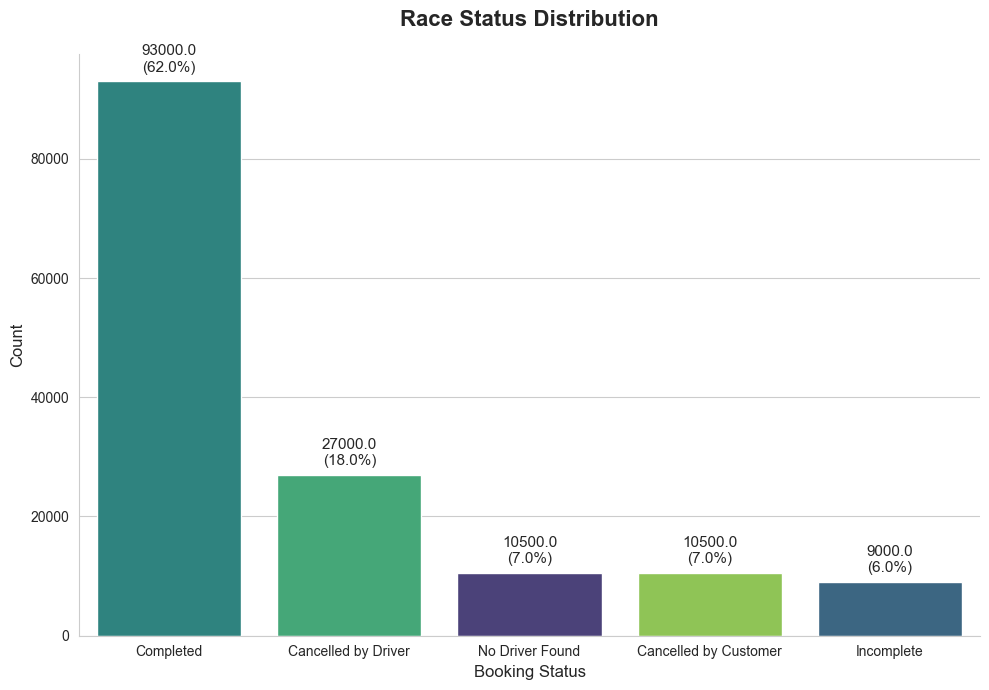

In [16]:
# --- 1. Preparação e Estilo ---

# Definido um estilo visual mais limpo para o gráfico. Outras opções: 'darkgrid', 'white', 'ticks'
sns.set_style('whitegrid') 
# Define o tamanho da figura (largura, altura em polegadas). Isso evita gráficos achatados ou esticados.
plt.figure(figsize=(10, 7)) 

# --- 2. Ordenação ---
# Ordenar as barras pela frequência (do maior para o menor) torna a leitura mais intuitiva.
# Isso cria uma lista com os status ordenados pela contagem.
ordem_barras = status_analysis['Booking Status'].value_counts().index

# --- 3. Criação do Gráfico ---
# Criando o gráfico e o atribuímos a um objeto 'ax' (axes).
# Isso nos dá controle total sobre os elementos do gráfico.
# Adicionamos a ordem e uma paleta de cores para um visual mais agradável.
ax = sns.countplot(
    x='Booking Status', 
    data=status_analysis, 
    order=ordem_barras,  # Aplica a ordem que criamos
    palette='viridis',   # Escolhe uma paleta de cores. Outras opções: 'mako', 'rocket', 'crest'
    hue='Booking Status',
    legend=False 
)

# --- 4. Adicionar Anotações (Rótulos de Dados) ---
# Adicionando o número exato (ou porcentagem) em cima de cada barra.

total = len(status_analysis) # Pega o número total de corridas para calcular a porcentagem

for p in ax.patches:
    # Pega a altura da barra (que é a contagem)
    height = p.get_height()
    
    # Calcula a porcentagem
    percentage = 100 * height / total
    
    # Formata o texto que vai aparecer em cima da barra Ex: "1500\n(35.2%)"
    label_text = f'{height}\n({percentage:.1f}%)'
    
    # Define a posição e adiciona o texto ao gráfico
    ax.annotate(
        text=label_text, 
        xy=(p.get_x() + p.get_width() / 2, height), 
        xytext=(0, 5), # Deslocamento vertical de 5 pontos
        textcoords='offset points', 
        ha='center', # Centraliza o texto horizontalmente
        va='bottom', # Alinha pela base do texto
        fontsize=11
    )

# --- 5. Títulos, Rótulos e Ajustes Finais ---
# Títulos e rótulos claros são essenciais.
ax.set_title('Race Status Distribution', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Booking Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Remove as bordas desnecessárias (spines) do topo e da direita para um look mais "clean"
sns.despine(top=True, right=True)

# Ajusta o layout para garantir que nada seja cortado
plt.tight_layout()

# Exibir o Gráfico ---
plt.show()

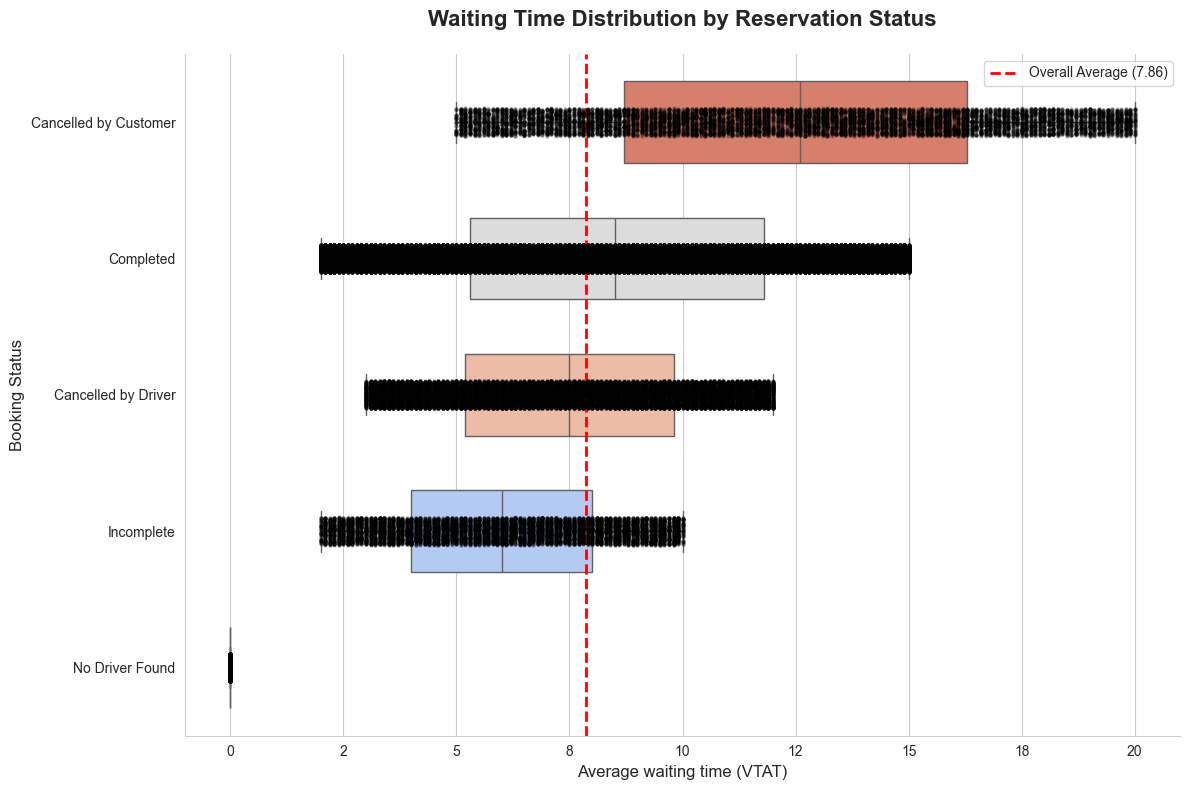

In [17]:
# --- 1. Preparação e Estilo ---
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# --- 2. Ordenação por Mediana (O passo mais importante para insight) ---
# Vamos ordenar as categorias (status) pela mediana do tempo de espera.
# Isso coloca os status com maior tempo de espera no topo, facilitando a análise.
median_order = status_analysis.groupby('Booking Status')['Avg VTAT'].median().sort_values(ascending=False).index

# --- 3. Criação do Gráfico (Horizontal para melhor leitura) ---
# A orientação horizontal (trocando x e y) é ideal quando os rótulos das categorias são longos.
ax = sns.boxplot(
    y='Booking Status',     # Categoria no eixo Y
    x='Avg VTAT',           # Valor numérico no eixo X
    data= status_analysis,
    order= median_order,   # Aplicando a ordem que foi criado
    palette='coolwarm',     # Paleta que pode indicar "quente" (alto) e "frio" (baixo)
    width= 0.6,              # Deixa os boxes um pouco mais finos
    hue='Booking Status',
    legend=False 
)

# --- 4. Sobreposição dos Pontos de Dados (Stripplot) ---
# Adiciona os pontos individuais sobre os boxes. Isso mostra a distribuição real e a densidade dos dados.
# É útil para ver se há concentrações específicas de pontos que o boxplot esconde.
sns.stripplot(
    y='Booking Status',
    x='Avg VTAT',
    data= status_analysis,
    order= median_order,
    color='black',          # Cor sutil para os pontos
    alpha= 0.3,              # Transparência para evitar poluição visual
    size=3                  # Tamanho pequeno dos pontos
)

# --- 5. Adicionar Linha de Média Global (Contexto) ---
# Calcula a média geral de tempo de espera e a plota como uma linha vertical.
# Isso cria uma referência clara para saber quais status estão acima ou abaixo da média geral.
overall_average = status_analysis['Avg VTAT'].mean()
ax.axvline(
    x=overall_average, 
    color='red', 
    linestyle='--', 
    linewidth=2, 
    label=f'Overall Average ({overall_average:.2f})' # Rótulo para a legenda
)

# --- 6. Títulos, Rótulos e Legenda ---
# Títulos e rótulos claros e informativos. Note que trocamos "Avg VTAT" por algo mais legível.
ax.set_title('Waiting Time Distribution by Reservation Status', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Average waiting time (VTAT)', fontsize=12)
ax.set_ylabel('Booking Status', fontsize=12)

# Melhora a formatação do eixo X (tempo)
ax.xaxis.set_major_formatter('{x:.0f}')

# Adiciona a legenda para a linha da média
ax.legend()

# --- 7. Limpeza e Exibição ---
sns.despine(left=False, bottom=False) # Remove as bordas
plt.tight_layout()
plt.show()

## PAYMENTS METHOD - ANALYSIS

1. Colunas: Date / Payment Method / Vehicle Type / Ride Distance

2. Criando um novo Datafreme - payment_analysis

3. Analise:
    * Distribuição dos métodos de pagamento:
Quantas corridas foram pagas em dinheiro, cartão, etc.

    * Distribuição dos tipos de veículos:
Quais tipos de veículos são mais usados.

    * Distância média das corridas por tipo de veículo:
Verificar se algum tipo de veículo faz corridas mais longas.

    * Distância média das corridas por método de pagamento:
Verificar quem está pagando em dinheiro faz corridas mais curtas ou longas.

    * Evolução do número de corridas ao longo do tempo:
Quantas corridas por dia/mês.

    * Distância média das corridas ao longo do tempo:
Verificar se as corridas estão ficando mais longas ou curtas com o tempo.

    * Relação entre tipo de veículo e método de pagamento:
Algum tipo de veículo recebe mais pagamentos em dinheiro ou cartão?


In [18]:
dados.head()

Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...                                NaN                       NaN   
1  ...                                NaN                       NaN   
2  ...                                NaN                       NaN   
3  ...                                NaN                       NaN   
4  ...                                NaN                       NaN   

   Driver Cancellation Reason Incomplete Rides  Incomplete Rides Reason  \
0                         NaN              NaN                      NaN   
1                         NaN              1.0        Vehicle Breakdown   
2                         NaN              NaN                      NaN   
3                         NaN              NaN                      NaN   
4                         NaN              NaN                      NaN   

  Booking Value  Ride Distance  Driver Ratings  Customer Rating  \
0           NaN            NaN             NaN              NaN   
1         237.0           5.73             NaN              NaN   
2         627.0          13.58             4.9              4.9   
3         416.0          34.02             4.6              5.0   
4         737.0          48.21             4.1              4.3   

   Payment Method  
0             NaN  
1             UPI  
2      Debit Card  
3             UPI  
4             UPI  

[5 rows x 21 columns]

In [19]:
# Selecionando as novas colunas para análise
new_columns = ['Date', 'Payment Method', 'Vehicle Type', 'Ride Distance', 'Booking Value',]
payment_analysis = dados[new_columns]
payment_analysis.head()

Date Payment Method   Vehicle Type  Ride Distance  Booking Value
0  2024-03-23            NaN          eBike            NaN            NaN
1  2024-11-29            UPI       Go Sedan           5.73          237.0
2  2024-08-23     Debit Card           Auto          13.58          627.0
3  2024-10-21            UPI  Premier Sedan          34.02          416.0
4  2024-09-16            UPI           Bike          48.21          737.0

In [20]:
# Salvandando o novo DataFrame em um arquivo CSV para futuras análises:
payment_analysis.to_csv('payment_analysis.csv', index=False)

In [21]:
# Carregando os dados que foi salvou
df = pd.read_csv('payment_analysis.csv')

# Verificando se os dados foram carregados corretamente
df.head()

Date Payment Method   Vehicle Type  Ride Distance  Booking Value
0  2024-03-23            NaN          eBike            NaN            NaN
1  2024-11-29            UPI       Go Sedan           5.73          237.0
2  2024-08-23     Debit Card           Auto          13.58          627.0
3  2024-10-21            UPI  Premier Sedan          34.02          416.0
4  2024-09-16            UPI           Bike          48.21          737.0

In [22]:
# Tratamento dos dados: substitui NaN e remove linhas com 'Cancelado' em Payment Method
payment_analysis = payment_analysis.copy()
payment_analysis['Payment Method'] = payment_analysis['Payment Method'].fillna('Cancelled')
payment_analysis['Ride Distance'] = payment_analysis['Ride Distance'].fillna(0)
payment_analysis['Booking Value'] = payment_analysis['Booking Value'].fillna(0)

# Remove linhas onde Payment Method é 'Cancelado'
payment_analysis = payment_analysis[payment_analysis['Payment Method'] != 'Cancelled']

payment_analysis.head()

Date Payment Method   Vehicle Type  Ride Distance  Booking Value
1  2024-11-29            UPI       Go Sedan           5.73          237.0
2  2024-08-23     Debit Card           Auto          13.58          627.0
3  2024-10-21            UPI  Premier Sedan          34.02          416.0
4  2024-09-16            UPI           Bike          48.21          737.0
5  2024-02-06            UPI           Auto           4.85          316.0

Analisando as perguntas e respondendo


In [23]:
# 1. Distribuição dos métodos de pagamento: Quantas corridas foram pagas em dinheiro, cartão, etc.
payment_analysis['Payment Method'].value_counts()

Payment Method
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64

In [24]:
# 2. Distribuição dos tipos de veículos: Quais tipos de veículos são mais usados.
payment_analysis['Vehicle Type'].value_counts()

Vehicle Type
Auto             25415
Go Mini          20364
Go Sedan         18318
Bike             15362
Premier Sedan    12315
eBike             7181
Uber XL           3045
Name: count, dtype: int64

In [25]:
# 3. Distância média das corridas por tipo de veículo: Verificar se algum tipo de veículo faz corridas mais longas.
payment_analysis.groupby('Vehicle Type')['Ride Distance'].mean().round(2)

Vehicle Type
Auto             24.62
Bike             24.65
Go Mini          24.61
Go Sedan         24.61
Premier Sedan    24.60
Uber XL          24.40
eBike            24.99
Name: Ride Distance, dtype: float64

In [26]:
# 4. Distância média das corridas por método de pagamento: Analise de pagamento em dinheiro, corridas mais curtas ou longas.
payment_analysis.groupby('Payment Method')['Ride Distance'].mean().round(2)

Payment Method
Cash           24.67
Credit Card    24.65
Debit Card     24.61
UPI            24.61
Uber Wallet    24.69
Name: Ride Distance, dtype: float64

In [27]:
# 5. Evolução do número de corridas ao longo do tempo: Quantas corridas por dia/mês, total do dia.

# Renomeando a coluna 'Date' para 'Data Corrida'
payment_analysis = payment_analysis.rename(columns={'Date': 'Race Date'})

# Convertendo para datetime
payment_analysis['Race Date'] = pd.to_datetime(payment_analysis['Race Date'])

# Evolução do número de corridas ao longo do tempo
total_races = payment_analysis.groupby(payment_analysis['Race Date'].dt.date).size().reset_index(name='Total Races')
total_races

Race Date  Total Races
0    2024-01-01          272
1    2024-01-02          258
2    2024-01-03          269
3    2024-01-04          281
4    2024-01-05          282
..          ...          ...
360  2024-12-26          259
361  2024-12-27          288
362  2024-12-28          272
363  2024-12-29          290
364  2024-12-30          261

[365 rows x 2 columns]

In [28]:
# 6. Distância média das corridas ao longo do tempo: Analisando se as corridas estão ficando mais longas ou curtas com o tempo.
payment_analysis.groupby(payment_analysis['Race Date'].dt.date)['Ride Distance'].mean().round(2)


Race Date
2024-01-01    25.94
2024-01-02    25.00
2024-01-03    25.99
2024-01-04    24.72
2024-01-05    24.74
              ...  
2024-12-26    26.21
2024-12-27    24.63
2024-12-28    24.01
2024-12-29    24.26
2024-12-30    23.96
Name: Ride Distance, Length: 365, dtype: float64

In [29]:
# 7. Relação entre tipo de veículo e método de pagamento: Algum tipo de veículo recebe mais pagamentos em dinheiro ou cartão?
pd.crosstab(payment_analysis['Vehicle Type'], payment_analysis['Payment Method'])

Payment Method  Cash  Credit Card  Debit Card    UPI  Uber Wallet
Vehicle Type                                                     
Auto            6252         2568        2097  11336         3162
Bike            3854         1527        1222   6966         1793
Go Mini         5137         2006        1608   9256         2357
Go Sedan        4643         1884        1470   8153         2168
Premier Sedan   2990         1240        1007   5574         1504
Uber XL          784          278         267   1329          387
eBike           1707          706         568   3295          905

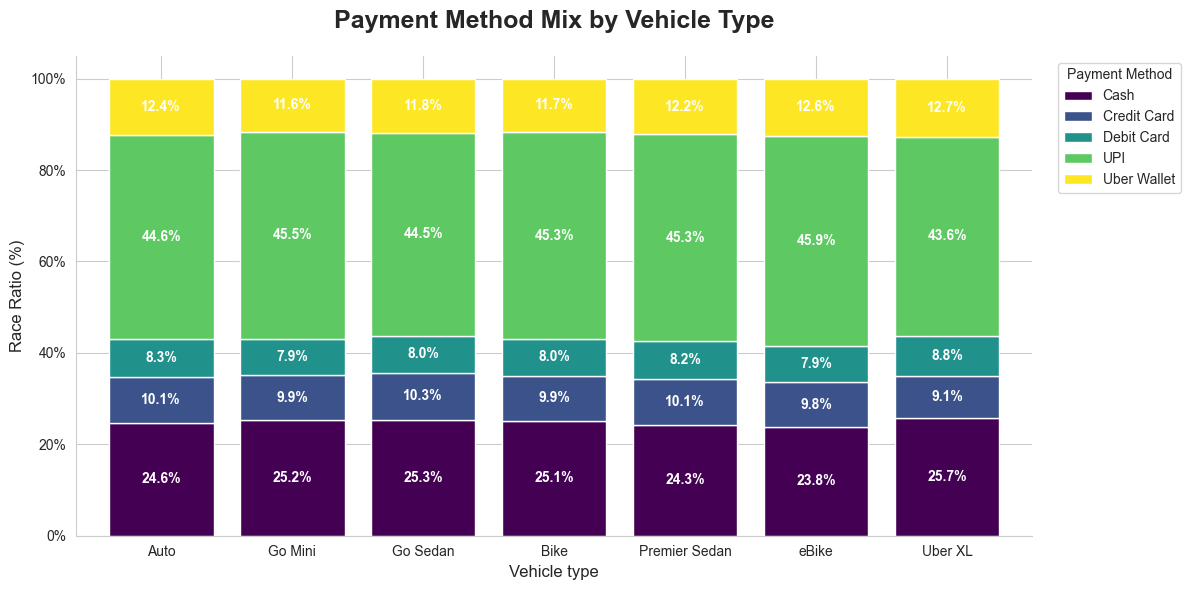

In [30]:
import matplotlib.ticker as mtick # Usaremos para formatar o eixo Y como porcentagem

# --- 1: Preparação dos Dados ---
# Seu crosstab está perfeito. Vamos apenas ordená-lo e normalizá-lo para 100%.

# 1.1 Cria a tabela de contingência (crosstab)
crosstab_df = pd.crosstab(payment_analysis['Vehicle Type'], payment_analysis['Payment Method'])

# 1.2 Ordena os tipos de veículo pelo total de corridas
soma_linhas = crosstab_df.sum(axis=1).sort_values(ascending=False)
crosstab_ordenado = crosstab_df.loc[soma_linhas.index]

# 1.3 Normaliza os dados para que cada linha some 100%
# Dividimos cada valor pela soma da sua linha (axis=0 para operar nas linhas)
crosstab_perc = crosstab_ordenado.div(crosstab_ordenado.sum(axis=1), axis=0)


# --- 2: Criação do Gráfico Profissional ---

# Definindo estilo e tamanho da figura
sns.set_style("whitegrid")
ax = crosstab_perc.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='viridis', # Uma paleta de cores com bom contraste
    width=0.8
)


# ---  3: Anotações e Ajustes Finais ---

# 3.1 Adicionando os rótulos de porcentagem no meio de cada segmento da barra
for container in ax.containers:
    # A função bar_label lida com o posicionamento automaticamente
    ax.bar_label(
        container,
        labels=[f'{v.get_height():.1%}' if v.get_height() > 0 else '' for v in container],
        label_type='center', # Posiciona o rótulo no centro do segmento
        color='white',
        weight='bold',
        fontsize=10
    )

# 3.2 Formatando o eixo Y para mostrar porcentagens
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 3.3 Movendo a legenda para fora do gráfico para não obstruir a visão
ax.legend(
    title='Payment Method',
    bbox_to_anchor=(1.02, 1), # Posição (x, y)
    loc='upper left'
)

# --- 4: Definindo títulos e rótulos ---
ax.set_title('Payment Method Mix by Vehicle Type', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Vehicle type', fontsize=12)
ax.set_ylabel('Race Ratio (%)', fontsize=12)
 
# 4. Rotacionando os rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=00, ha='center')

# 4.2 Limpando as bordas
sns.despine()

# 4.3 Ajustando o layout para garantir que a legenda externa caiba
plt.tight_layout()

# 4.4 Exibindo o gráfico final
plt.show()

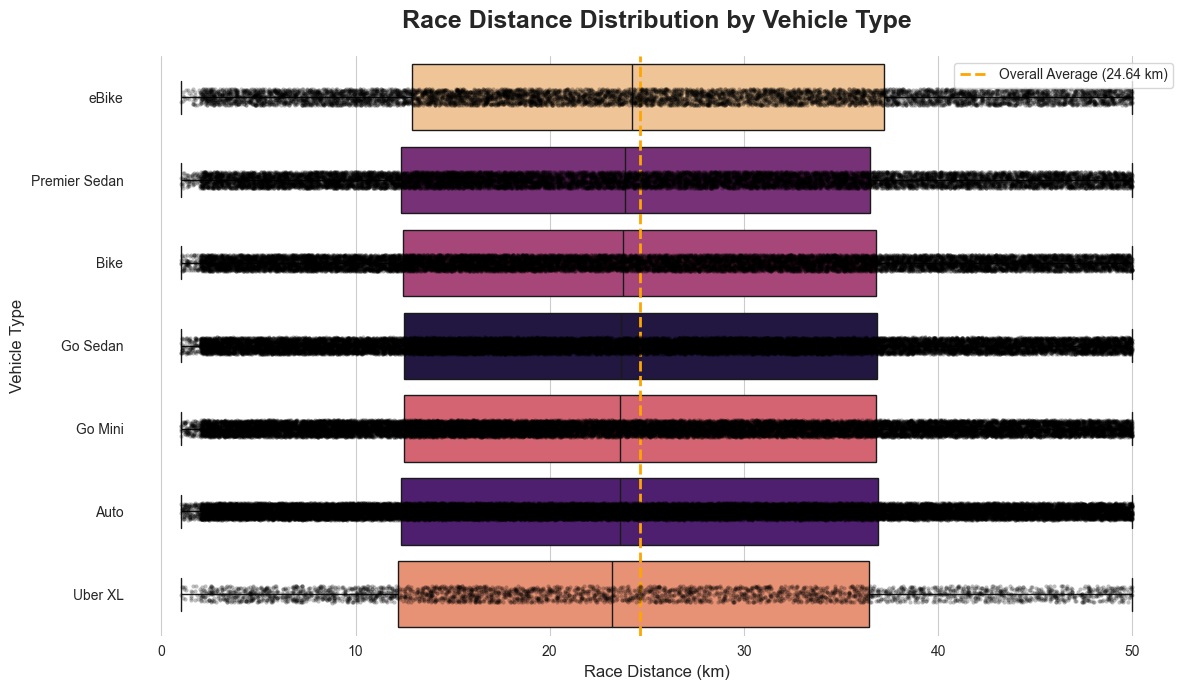

In [31]:
# --- 1: Preparação dos Dados ---
# Ordenando as categorias, pela mediana da variável que está sendo analisada.
# Isso nos mostrará quais tipos de veículo estão associados às corridas mais longas.

# Calculando a ordem dos tipos de veículo pela mediana da distância
vehicle_order = payment_analysis.groupby('Vehicle Type')['Ride Distance'].median().sort_values(ascending=False).index

# --- 2: Criação do Gráfico ---

# 2.1 Definindo estilo visual e tamanho da figura
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# 2.3 Criando o boxplot com Seaborn.
# Usando a orientação horizontal para facilitar a leitura dos rótulos.
ax = sns.boxplot(
    data= payment_analysis,
    x='Ride Distance',    # Variável numérica no eixo X
    y='Vehicle Type',     # Variável categórica no eixo Y
    order= vehicle_order, # Ordenação que foi calculado
    palette='magma',
    hue='Vehicle Type',
    legend= False
)

# 2.4 Adicionando os pontos de dados individuais sobre os boxplots.
# Vai mostra a densidade e o volume de corridas para cada tipo de veículo.
sns.stripplot(
    data= payment_analysis,
    x='Ride Distance',
    y='Vehicle Type',
    order=vehicle_order,
    color='black',        # Cor sutil para os pontos
    alpha=0.25,           # Transparência para evitar poluição visual
    size=3                # Tamanho pequeno dos pontos
)

# 2.5 Adicionando uma linha vertical com a média de todo o período para dar contexto
overall_average = payment_analysis['Ride Distance'].mean()
ax.axvline(
    overall_average,
    color='orange',
    linestyle='--',
    linewidth=2,
    label=f'Overall Average ({overall_average:.2f} km)' # Texto para a legenda
)

# --- 3: Anotações e Ajustes Finais ---

# 3.1 Definindo títulos e rótulos com mais destaque
ax.set_title('Race Distance Distribution by Vehicle Type', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Race Distance (km)', fontsize=12) # Adicionando a unidade de medida
ax.set_ylabel('Vehicle Type',fontsize=12)
ax.legend()

# 3.2 Limpando as bordas desnecessárias
sns.despine(left=True, bottom=True)

# 3.3 Ajustando o layout
plt.tight_layout()

# 3.4 Exibindo o gráfico final 
plt.show()

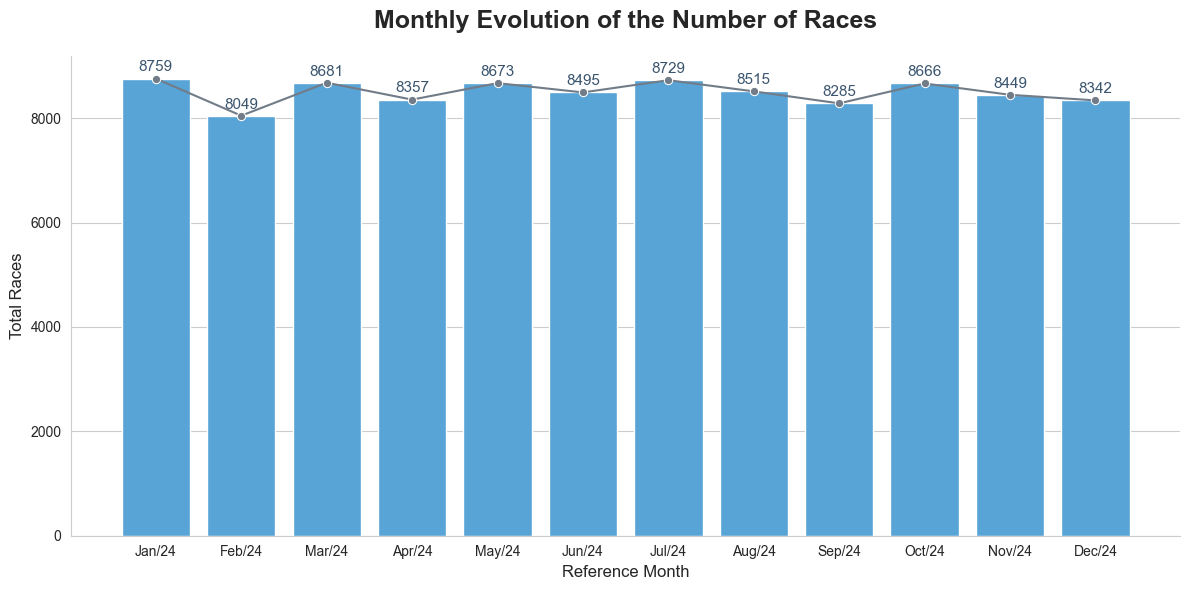

In [32]:
# --- 1: Preparação dos Dados ---

# 1.1 Agrupando e contando as corridas por mês
races_per_month_series = payment_analysis.groupby(payment_analysis['Race Date'].dt.to_period('M')).size()

# 1.2 Convertendo a Series para um DataFrame e formatando o Mês para o gráfico
races_per_month_df = races_per_month_series.to_frame(name='Number of Races').reset_index()

# 1.3 Formata a coluna de período para o formato 'Mês/Ano' (ex: 'Jan/25'), garantindo que o mês esteja em inglês.
races_per_month_df['Month'] = races_per_month_df['Race Date'].dt.to_timestamp().dt.month_name().str[:3] + '/' + races_per_month_df['Race Date'].dt.strftime('%y')


# --- 2: Criação do Gráfico ---

# 2.1 Definindo um estilo visual limpo e o tamanho da figura
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# 2.2 Criando o gráfico de barras com Seaborn
ax = sns.barplot(
    data= races_per_month_df,
    x='Month',
    y='Number of Races',
    color="#43a8eb"
)

# 2.3 Adicionando uma linha de tendência
sns.lineplot(
    data= races_per_month_df,
    x='Month',
    y='Number of Races',
    color="#717c88",
    marker='o',
    ax=ax
)

# --- 3: Anotações e Ajustes Finais ---

# 3.1 Adicionando os rótulos de dados
ax.bar_label(
    ax.containers[0],
    fontsize=11,
    color="#3b556e",
    padding=3
)

# 3.2 Definindo títulos e rótulos
ax.set_title('Monthly Evolution of the Number of Races', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Reference Month', fontsize=12)
ax.set_ylabel('Total Races', fontsize=12)

# 3.3 Rotacionando os rótulos do eixo X
plt.xticks(ha='center') # Mantido ha='center' como discutimos

# 3.4 Limpando as bordas desnecessárias
sns.despine()

# 3.5 Garantindo que todos os elementos do gráfico fiquem bem ajustados
plt.tight_layout()

# 3.6 Exibindo o gráfico final
plt.show()

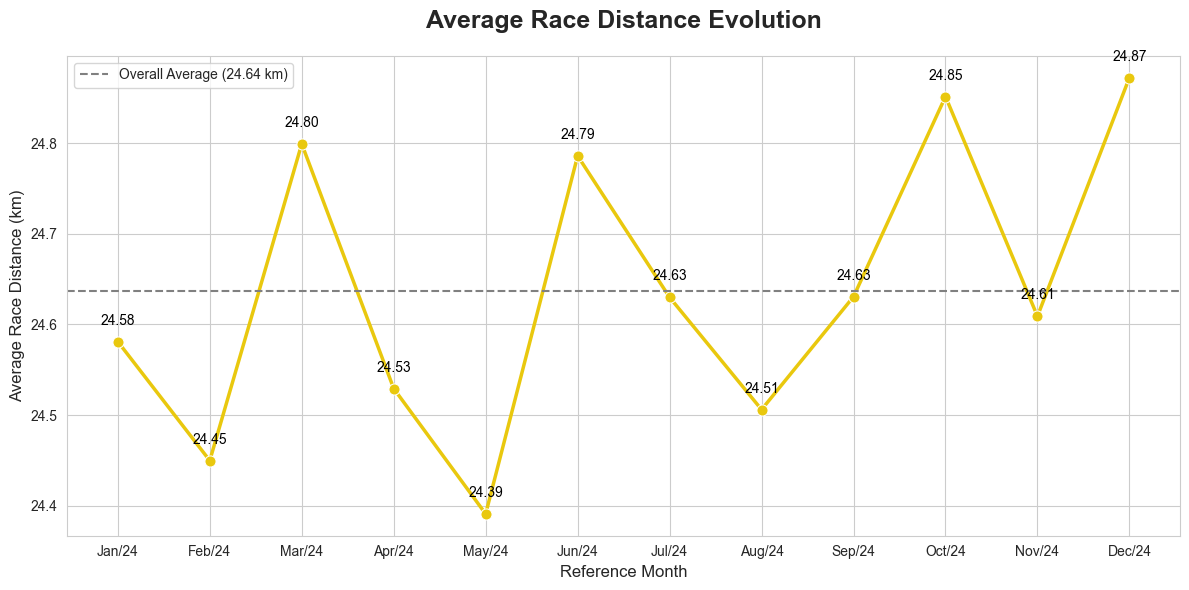

In [33]:
# --- 1: Preparação dos Dados ---

# 1.1 Agrupando e calculando a distância média por mês
average_series_distance = payment_analysis.groupby(payment_analysis['Race Date'].dt.to_period('M'))['Ride Distance'].mean()

# 1.2 Convertendo para DataFrame e formatando o Mês para o gráfico
races_per_month_df = average_series_distance.to_frame(name='Average Distance').reset_index()

# 1.3 Garantindo o mês em inglês
races_per_month_df['Month'] = races_per_month_df['Race Date'].dt.to_timestamp().dt.month_name().str[:3] + '/' + races_per_month_df['Race Date'].dt.strftime('%y')


# --- 2: Criação do Gráfico ---

# 2.1 Definindo estilo visual e tamanho da figura
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# 2.2 Criando o gráfico de linha com Seaborn
ax = sns.lineplot(
    data= races_per_month_df,
    x='Month',
    y='Average Distance',
    marker='o',
    markersize=8,
    linewidth=2.5,
    color="#e9c80e"
)

# 2.3 Adicionando a linha de média geral
overall_average = payment_analysis['Ride Distance'].mean()
ax.axhline(
    overall_average,
    color='gray',
    linestyle='--',
    linewidth=1.5,
    label=f'Overall Average ({overall_average:.2f} km)'
)


# --- 3: Anotações e Ajustes Finais ---

# 3.1 Utilizando o ax.annotate() para posicionar os rótulos
for index, row in races_per_month_df.iterrows():
    label = f"{row['Average Distance']:.2f}"
    ax.annotate(
        text=label,
        xy=(row['Month'], row['Average Distance']),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# 3.2 Ajustando o título com espaçamento correto
ax.set_title('Average Race Distance Evolution', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Reference Month', fontsize=12)
ax.set_ylabel('Average Race Distance (km)', fontsize=12)
ax.legend()

# 3.3 Rotacionando os rótulos do eixo X
plt.xticks(ha='center')

# 3.4 Limpando as bordas
#sns.despine()

# 3.5 Ajustando o layout
plt.tight_layout()

# 3.6 Exibindo o gráfico final
plt.show()

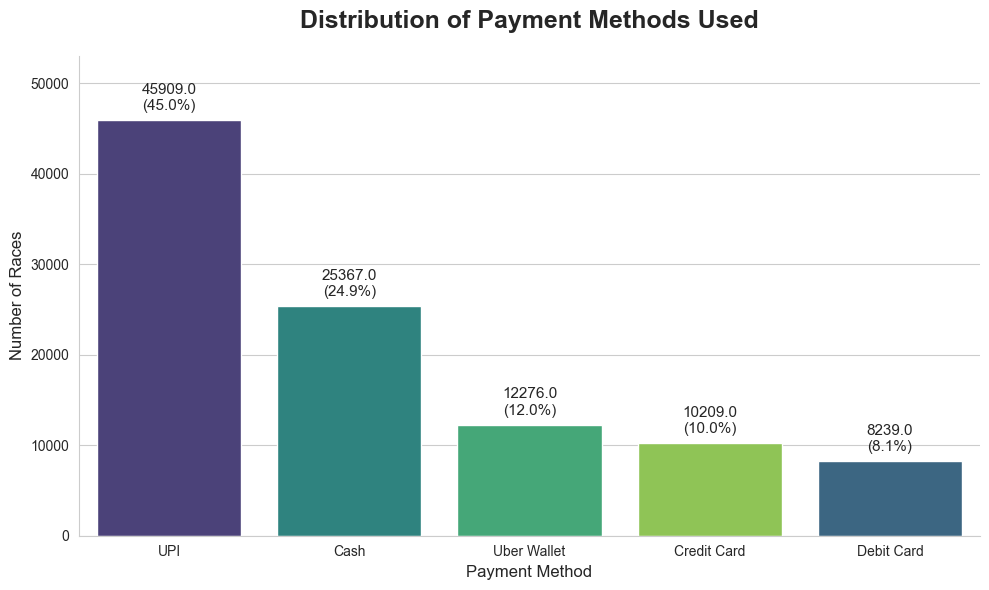

In [34]:
# --- 1: Preparação dos Dados ---

# Criando uma lista com a ordem correta das categorias
payment_order = payment_analysis['Payment Method'].value_counts().index


# --- 2: Criação do Gráfico ---

# 2.1 Definindo estilo visual e tamanho da figura
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# 2.2 Criando o gráfico de barras com Seaborn, aplicando a ordem e uma paleta de cores
ax = sns.countplot(
    data= payment_analysis,
    x='Payment Method',
    order= payment_order,     # Aplica a ordenação
    palette='viridis',        # Paleta de cores com bom contraste
    hue='Payment Method',      
    legend=False                
)

# --- 3: Anotações e Ajustes Finais ---

# 3.1 Adicionando os rótulos de dados (contagem e porcentagem) em cima de cada barra
total = len(payment_analysis) # Total de corridas para calcular a porcentagem
for p in ax.patches:
    height = p.get_height()
    # Evita erro de divisão por zero se uma categoria não tiver dados
    if height > 0:
        percentage = 100 * height / total
        label_text = f'{height}\n({percentage:.1f}%)' # Formato: "1500\n(35.2%)"
        
        # Usando ax.annotate para posicionar o texto
        ax.annotate(
            text=label_text,
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 5), # Deslocamento de 5 pontos na vertical
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=11
        )

# 3.2 Definindo títulos e rótulos com mais destaque
ax.set_title('Distribution of Payment Methods Used', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Payment Method', fontsize=12)
ax.set_ylabel('Number of Races', fontsize=12)

# 3.3 Rotacionando os rótulos do eixo X para melhor legibilidade
plt.xticks(ha='center')

# 3.4 Aumentando o limite do eixo Y em 10% para dar espaço para as anotações
ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

# 3.5 Limpando as bordas desnecessárias
sns.despine()

# 3.6 Ajustando o layout
plt.tight_layout()

# 3.7 Exibindo o gráfico final
plt.show()

## RACE - ANALYSIS

1. Colunas adicional: time of day / day of the week / is_cancelled

2. Criando um novo Datafreme - new_file_path

3. Analise:

    * Contagem de Corridas por Hora do Dia

    * Padrão de Corridas ao Longo do Dia

    * Volume de Corridas ao longo da semana

    * Picos de Demanda e Variação Entre os 5 Top Locais

In [35]:
# Verificando a estrutura e do conteúdo das colunas do arquivo original.
dados.head()

Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...                                NaN                       NaN   
1  ...                                NaN                       NaN   
2  ...                                NaN                       NaN   
3  ...                                NaN                       NaN   
4  ...                                NaN                       NaN   

   Driver Cancellation Reason Incomplete Rides  Incomplete Rides Reason  \
0                         NaN              NaN                      NaN   
1                         NaN              1.0        Vehicle Breakdown   
2                         NaN              NaN                      NaN   
3                         NaN              NaN                      NaN   
4                         NaN              NaN                      NaN   

  Booking Value  Ride Distance  Driver Ratings  Customer Rating  \
0           NaN            NaN             NaN              NaN   
1         237.0           5.73             NaN              NaN   
2         627.0          13.58             4.9              4.9   
3         416.0          34.02             4.6              5.0   
4         737.0          48.21             4.1              4.3   

   Payment Method  
0             NaN  
1             UPI  
2      Debit Card  
3             UPI  
4             UPI  

[5 rows x 21 columns]

In [36]:
# Combinar as colunas 'Date' e 'Time' e converter para datetime ---

# Criamos uma nova coluna juntando a data e a hora com um espaço entre elas
dados['datetime'] = dados['Date'] + ' ' + dados['Time']

# Convertemos a nova coluna para o formato datetime.
# O 'errors='coerce'' é uma boa prática para transformar em NaT (Not a Time)
# qualquer valor que não possa ser convertido, evitando erros.
dados['datetime'] = pd.to_datetime(dados['datetime'], errors='coerce')

# Removemos linhas onde a conversão de data/hora possa ter falhado
dados.dropna(subset=['datetime'], inplace=True)

print("Conversão concluída! A nova coluna 'datetime' foi criada.")





Conversão concluída! A nova coluna 'datetime' foi criada.


In [37]:
# verificando a nova coluna (datetime)
dados

Date      Time    Booking ID   Booking Status   Customer ID  \
0       2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1       2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2       2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3       2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4       2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   
...            ...       ...           ...              ...           ...   
149995  2024-11-11  19:34:01  "CNR6500631"        Completed  "CID4337371"   
149996  2024-11-24  15:55:09  "CNR2468611"        Completed  "CID2325623"   
149997  2024-09-18  10:55:15  "CNR6358306"        Completed  "CID9925486"   
149998  2024-10-05  07:53:34  "CNR3030099"        Completed  "CID9415487"   
149999  2024-03-10  15:38:03  "CNR3447390"        Completed  "CID4108667"   

         Vehicle Type         Pickup Location      Drop Location  Avg VTAT  \
0               eBike             Palam Vihar            Jhilmil       NaN   
1            Go Sedan           Shastri Nagar  Gurgaon Sector 56       4.9   
2                Auto                 Khandsa      Malviya Nagar      13.4   
3       Premier Sedan     Central Secretariat           Inderlok      13.1   
4                Bike        Ghitorni Village        Khan Market       5.3   
...               ...                     ...                ...       ...   
149995        Go Mini                 MG Road           Ghitorni      10.2   
149996        Go Mini        Golf Course Road         Akshardham       5.1   
149997       Go Sedan  Satguru Ram Singh Marg           Jor Bagh       2.7   
149998           Auto               Ghaziabad         Saidulajab       6.9   
149999  Premier Sedan         Ashok Park Main  Gurgaon Sector 29       3.5   

        Avg CTAT  ...  Cancelled Rides by Driver Driver Cancellation Reason  \
0            NaN  ...                        NaN                        NaN   
1           14.0  ...                        NaN                        NaN   
2           25.8  ...                        NaN                        NaN   
3           28.5  ...                        NaN                        NaN   
4           19.6  ...                        NaN                        NaN   
...          ...  ...                        ...                        ...   
149995      44.4  ...                        NaN                        NaN   
149996      30.8  ...                        NaN                        NaN   
149997      23.4  ...                        NaN                        NaN   
149998      39.6  ...                        NaN                        NaN   
149999      33.7  ...                        NaN                        NaN   

        Incomplete Rides Incomplete Rides Reason  Booking Value Ride Distance  \
0                    NaN                     NaN            NaN           NaN   
1                    1.0       Vehicle Breakdown          237.0          5.73   
2                    NaN                     NaN          627.0         13.58   
3                    NaN                     NaN          416.0         34.02   
4                    NaN                     NaN          737.0         48.21   
...                  ...                     ...            ...           ...   
149995               NaN                     NaN          475.0         40.08   
149996               NaN                     NaN         1093.0         21.31   
149997               NaN                     NaN          852.0         15.93   
149998               NaN                     NaN          333.0         45.54   
149999               NaN                     NaN          806.0         21.19   

        Driver Ratings  Customer Rating  Payment Method            datetime  
0                  NaN              NaN             NaN 2024-03-23 12:29:38  
1                  NaN              NaN             UPI 2024-11-29 18:01:3

In [38]:
# Salvando o DataFrame modificado em um novo arquivo CSV ---

# Definido o nome do novo arquivo
new_file_path = r'C:\Users\User\Desktop\Pasta de projeto Kaggle\archive\ncr_ride_bookings_cleaned.csv'

# Salvando o DataFrame no novo arquivo, sem a coluna de índice
dados.to_csv(new_file_path, index=False)

# Aviso de salvamento.
print(f"DataFrame salvo com sucesso em: {new_file_path}")


DataFrame salvo com sucesso em: C:\Users\User\Desktop\Pasta de projeto Kaggle\archive\ncr_ride_bookings_cleaned.csv


In [39]:
# --- Extrair hora e corridas ---
# Extraindo todas as corridas durante o ano de 2024 por hora.
dados['time_of_day'] = dados['datetime'].dt.hour

# Contar o número de corridas por hora e ordenar pelo índice (da hora 0 à 23)
corridas_por_hora = dados['time_of_day'].value_counts().sort_index()

print("\n--- Contagem de Corridas por Hora do Dia ---")
corridas_por_hora



--- Contagem de Corridas por Hora do Dia ---


time_of_day
0      1373
1      1360
2      1339
3      1383
4      1321
5      2786
6      4160
7      5450
8      6861
9      8234
10     9577
11     8390
12     7006
13     5470
14     7031
15     8202
16     9633
17    11044
18    12397
19    11047
20     9630
21     8103
22     5441
23     2762
Name: count, dtype: int64

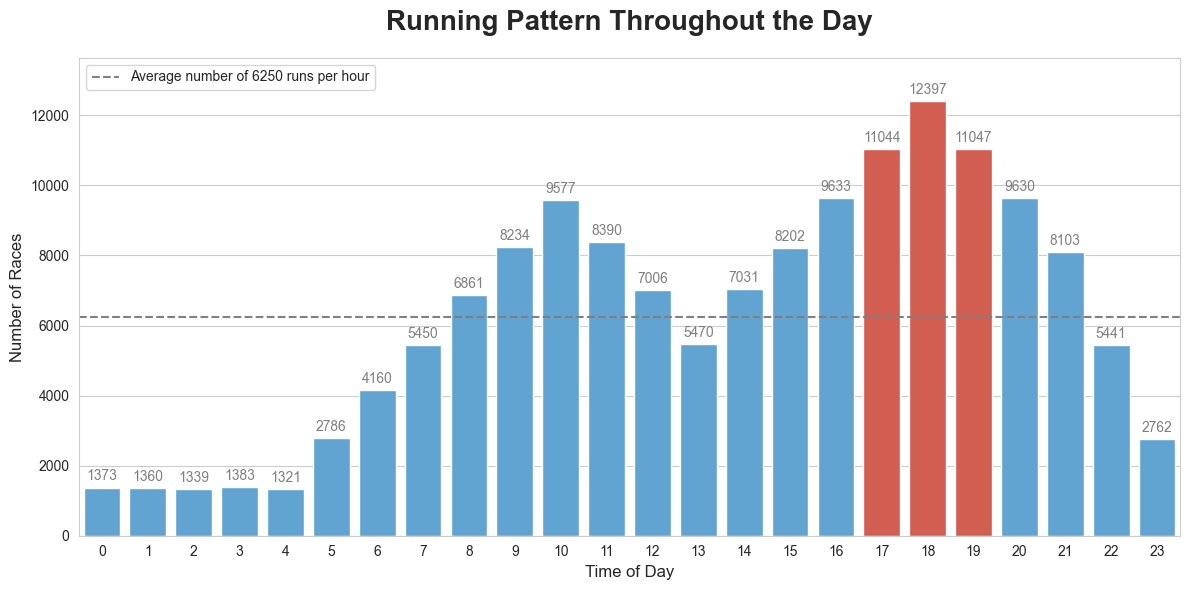

In [40]:
# --- 1: Análise para o Gráfico ---

# Criando a variável (races_per_hour) para contagem das corridas por hora
races_per_hour = dados['time_of_day'].value_counts()

# Identificando os 3 horários de maior movimento para destacá-los
races_per_hour = races_per_hour.sort_index()
top_3_horas = races_per_hour.nlargest(3).index

# Esse código criar uma paleta de cores customizada: uma cor para o pico, outra para o restante
cor_pico = '#e74c3c'  # Vermelho
cor_base = "#4fa8e4"  # Azul
custom_pick = [cor_pico if hora in top_3_horas else cor_base for hora in races_per_hour.index]


# --- 2: Desenvolvimento do Gráfico ---

# Definindo estilo e tamanho da figura
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Criando o gráfico de barras com a paleta customizada
ax = sns.barplot(
    x= races_per_hour.index,
    y= races_per_hour.values,
    palette= custom_pick,
    hue= races_per_hour.index, # Nova linha
    legend=False
)

# Adicionando uma linha horizontal com a média de corridas por hora
average_runs = races_per_hour.mean()
ax.axhline(
    average_runs,
    color='gray',
    linestyle='--',
    linewidth=1.5,
    label=f'Average number of {average_runs:.0f} runs per hour'
)


# --- 3: Anotações e Ajustes Finais ---

# Adicionando os rótulos de dados (a contagem exata) em cima de cada barra
for container in ax.containers:
    ax.bar_label(
        container,
        fontsize=10,
        color='gray',
        padding=3
    )

# Definindo títulos e rótulos com mais destaque
ax.set_title('Running Pattern Throughout the Day', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Time of Day', fontsize=12)
ax.set_ylabel('Number of Races', fontsize=12)

# Adicionando a legenda (para a linha da média)
ax.legend()

# Garantindo que o eixo X mostre as horas de forma clara
ax.tick_params(axis='x', rotation=0)

# Aumentando o limite do eixo Y para dar espaço para as anotações
ax.set_ylim(0, races_per_hour.max() * 1.10)

# Limpando as bordas desnecessárias
#sns.despine()

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico final
plt.show()

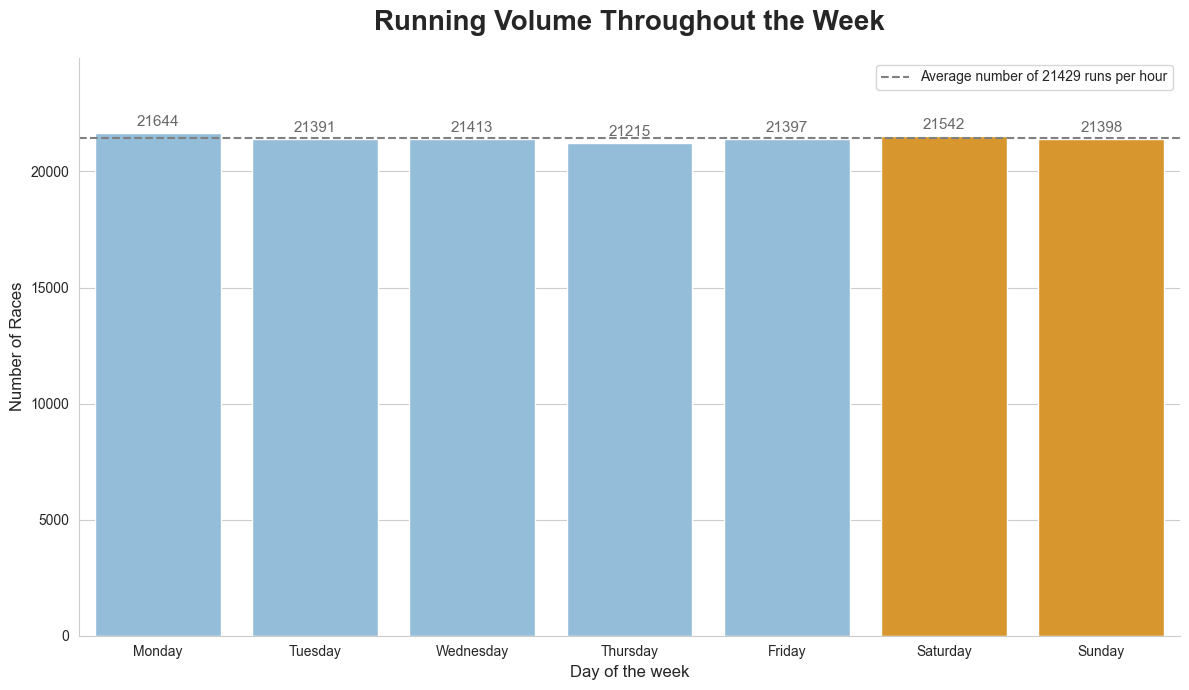

In [41]:
# --- 1: Preparação dos Dados ---

# Extrai o nome do dia da semana (o resultado inicial será em inglês)
dados['day_of_the_week'] = dados['datetime'].dt.day_name()

# Conta o número de corridas por dia
races_per_day = dados['day_of_the_week'].value_counts()

# Ordena os dias corretamente na ordem da semana (usando a referência em inglês)
dias_ordenados_en = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
races_per_day = races_per_day.reindex(dias_ordenados_en)

# --- 2: Análise para o Gráfico ---

# Define a paleta de cores para destacar o fim de semana
weekend_days = ['Saturday', 'Sunday']
cor_fds = '#f39c12'  # Laranja para o fim de semana
cor_util = "#88bfe4"  # Azul para dias úteis
paleta_semana = [cor_fds if dia in weekend_days else cor_util for dia in races_per_day.index]


# --- 3: Desenvolvimento do Gráfico ---

# Define o estilo e o tamanho da figura
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Cria o gráfico de barras. O Seaborn agora usará os nomes diretamente.
ax = sns.barplot(
    x= races_per_day.index,
    y= races_per_day.values,
    palette=paleta_semana,
    hue= races_per_day.index,
    legend=False
)

# Adiciona uma linha horizontal com a média diária de corridas
daily_average = races_per_day.mean()
ax.axhline(
    daily_average,
    color='gray',
    linestyle='--',
    linewidth=1.5,
    label=f'Average number of {daily_average:.0f} runs per hour'
)



# --- 4: Anotações e Ajustes Finais ---

# Adiciona os rótulos de dados (a contagem exata) em cima de cada barra
for container in ax.containers:
    ax.bar_label(
        container,
        fontsize=11,
        color='dimgray',
        padding=3
    )

# Rotaciona os rótulos do eixo X para melhor legibilidade
plt.xticks(ha="center")

# Define títulos e rótulos
ax.set_title('Running Volume Throughout the Week', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Day of the week', fontsize=12)
ax.set_ylabel('Number of Races', fontsize=12)
ax.legend()

# Aumenta o limite do eixo Y para dar espaço para as anotações
ax.set_ylim(0, races_per_day.max() * 1.15)

# Retira as bordas desnecessárias do gráfico
sns.despine()

# Ajusta o layout para evitar que os rótulos fiquem cortados
plt.tight_layout()

# Exibe o gráfico final
plt.show()


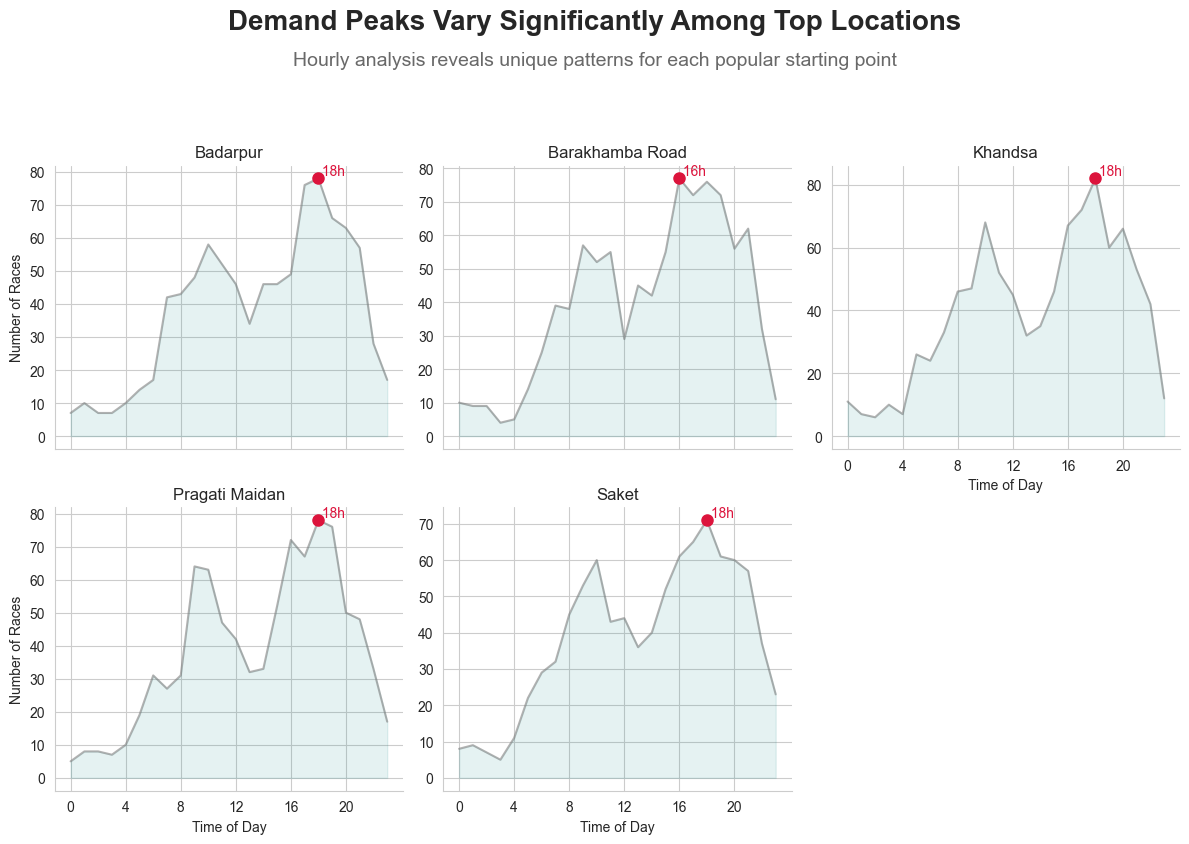

In [42]:
# --- 1: Preparação dos Dados ---

# Encontra os 5 locais de partida mais frequentes e armazena seus nomes em uma lista.
top_5_locations = dados['Pickup Location'].value_counts().head(5).index.tolist()

# Filtra o DataFrame original ('dados') para manter apenas as corridas que começaram nos top 5 locais.
df_top_locals = dados[dados['Pickup Location'].isin(top_5_locations)]

# Agrupa os dados filtrados por local e hora do dia, contando o número de corridas em cada grupo.
# .reset_index() transforma o resultado de volta em um DataFrame limpo.
local_count_time = df_top_locals.groupby(['Pickup Location', 'time_of_day']).size().reset_index(name='number_of_races')


# --- 2: STORYTELLING VISUAL: Refinamento do FacetGrid ---

# 2.1. Criar a grade de gráficos
# FacetGrid cria uma estrutura para múltiplos gráficos (small multiples), um para cada local.
# - col="Pickup Location": Cria uma coluna de gráficos para cada valor único na coluna 'Pickup Location'.
# - col_wrap=3: Define que teremos no máximo 3 gráficos por linha.
# - height=4: Controla a altura de cada mini-gráfico.
# - sharey=False: Permite que cada gráfico tenha sua própria escala no eixo Y, ideal para comparar padrões quando os volumes são muito diferentes.
g = sns.FacetGrid(local_count_time, col="Pickup Location", col_wrap=3, height=4, sharey=False)

# 2.2 Mapear o gráfico de linha base para a grade
# .map() aplica um tipo de gráfico a cada faceta (mini-gráfico) da grade.
# Aqui, usamos um gráfico de linha cinza e sutil como base para cada local.
g.map(sns.lineplot, "time_of_day", "number_of_races", color='gray', alpha=0.6)


# --- 3: Destaque de Pico e Preenchimento de Área ---

# Itera sobre cada eixo ('ax', o objeto do mini-gráfico) e seu título correspondente (o nome do local).
# Isso vai permitir adicionar detalhes personalizados a cada gráfico individualmente.
for ax, title in zip(g.axes.flat, g.col_names):
    # Filtra os dados para obter apenas as informações do local atual do loop.
    df_local = local_count_time[local_count_time['Pickup Location'] == title]
    
    # Adiciona uma área sombreada sob a linha para dar uma sensação de volume.
    ax.fill_between(df_local['time_of_day'], df_local['number_of_races'], alpha=0.1, color='teal')
    
    # Adiciona uma verificação de segurança para evitar erros se um local não tiver dados.
    if not df_local.empty:
        # Encontra a linha com o maior número de corridas para identificar o pico.
        pico = df_local.loc[df_local['number_of_races'].idxmax()]
        # Extrai os valores da hora e da contagem do pico.
        hora_pico = pico['time_of_day']
        valor_pico = pico['number_of_races']
        
        # Desenha um ponto de destaque (vermelho e maior) exatamente na hora de pico.
        ax.plot(hora_pico, valor_pico, 'o', ms=8, color='crimson')
        # Escreve o texto da hora de pico ao lado do ponto de destaque para clareza.
        ax.text(hora_pico, valor_pico, f' {hora_pico}h', color='crimson', ha='left', va='bottom', fontsize=10)


# --- 4: Títulos, Rótulos e Ajustes Finais ---

# Define um título principal para toda a figura (dashboard).
g.fig.suptitle('Demand Peaks Vary Significantly Among Top Locations', fontsize=20, fontweight='bold', y=1.05)
# Adiciona um subtítulo para dar mais contexto à análise.
g.fig.text(0.5, 0.98, 'Hourly analysis reveals unique patterns for each popular starting point', 
           ha='center', fontsize=14, color='dimgray')

# Define o título de cada mini-gráfico, usando o nome da coluna ({col_name}).
g.set_titles("{col_name}", size=12)
# Define os rótulos dos eixos X e Y para todos os mini-gráficos.
g.set_axis_labels("Time of Day", "Number of Races")
# Personaliza os ticks (marcas) do eixo X para mostrar de 4 em 4 horas, evitando poluição visual.
g.set(xticks=range(0, 24, 4))

# Ajusta o espaçamento entre os elementos do gráfico para evitar sobreposição.
# O 'rect' dá espaço para o suptitle caber sem cortar.
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

 ## CANCELED RACES - ANALYSIS
 
 1. Investigando os cancelamentos.

2. Analise:
    * Quais são os principais motivos de cancelamento de corridas pelos clientes;
    * Extraindo as ocorrência Completed, Cancelled by Driver, No Driver Found, Cancelled by Customer, Incomplete;
    * Análise de taxa de cancelamento;
    * Taxa de cancelamento por hora do dia;
    * Adicionando um mapa geográficos para visualizar dados sobre onde a demanda está concentrada.






In [43]:
# --- Contagem dos motivos de cancelamento ---

# A coluna é 'Reason for cancelling by Customer'
# .value_counts() já ignora valores nulos e conta a ocorrência de cada motivo.
customer_cancellation_reasons = dados['Reason for cancelling by Customer'].value_counts()

# Mensagem na saída para titulo.
print("--- Contagem dos Motivos de Cancelamento pelo Cliente ---")
print(customer_cancellation_reasons)

--- Contagem dos Motivos de Cancelamento pelo Cliente ---
Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64


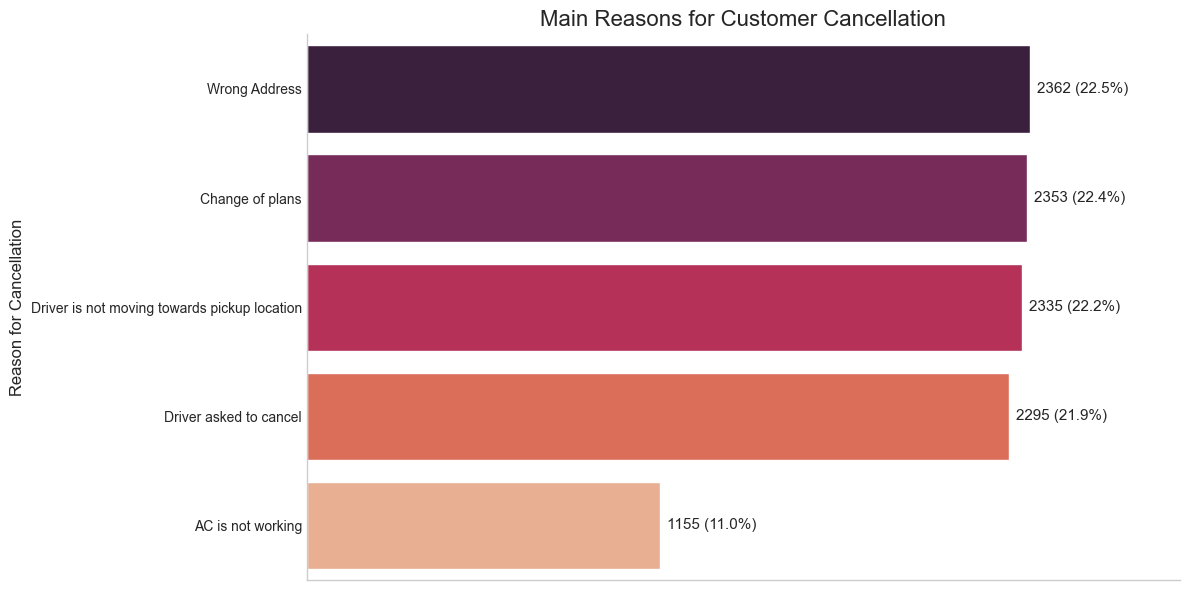

In [44]:
# --- 1: Visualizar os resultados ---

# Define o estilo visual do gráfico, com um fundo branco e linhas de grade.
plt.style.use('seaborn-v0_8-whitegrid')

# Cria a "tela" do gráfico, definindo seu tamanho (largura, altura em polegadas).
plt.figure(figsize=(12, 6))

# Cria o gráfico de barras e o atribui à variável 'ax' para personalização.
# - x e y: Definem os dados dos eixos. Como é horizontal, os valores numéricos vão no X.
# - palette: Define o esquema de cores das barras.
# - orient='h': Especifica que o gráfico deve ser horizontal.
# - hue e legend=False: Usados para evitar avisos de futuras versões do Seaborn.
ax = sns.barplot(
    x= customer_cancellation_reasons.values, 
    y= customer_cancellation_reasons.index, 
    palette='rocket', 
    orient='h',
    hue= customer_cancellation_reasons.index,
    legend= False
)

# --- 2: Adicionando Anotações de Contagem e Porcentagem no gráfico ---

# Calcula o total de cancelamentos para poder calcular a porcentagem de cada motivo.
total = customer_cancellation_reasons.sum()

# Loop para passa por cada barra ('p', de patch) desenhada no gráfico.
for p in ax.patches:
    # Pega a largura da barra, que corresponde ao valor (contagem) em um gráfico horizontal.
    width = p.get_width()
    # Calcula a porcentagem e mostra junto com contagem representa do total.
    percentage = 100 * width / total
    # Formata o texto que aparecerá ao lado da barra, incluindo a contagem e a porcentagem.
    label_text = f'{width:.0f} ({percentage:.1f}%)'

    # Adiciona o texto (anotação) no gráfico.
    # - text: O texto a ser exibido.
    # - xy: A coordenada (x, y) onde a anotação aponta (final da barra, no meio da sua altura).
    # - xytext: O deslocamento do texto em relação ao ponto xy (5 pixels para a direita, 0 na vertical).
    # - textcoords: Define que o deslocamento é medido em 'pontos' (pixels).
    # - ha e va: Definem o alinhamento do texto ('left' para a esquerda, 'center' para o centro).
    ax.annotate(
        text=label_text,
        xy=(width, p.get_y() + p.get_height() / 2),
        xytext=(5, 0),
        textcoords='offset points',
        ha='left',
        va='center',
        fontsize=11
    )

# --- 3: Ajustes Finais para o Storytelling ---

# Define o título principal do gráfico.
plt.title('Main Reasons for Customer Cancellation', fontsize=16)
# Define o rótulo do eixo Y (vertical).
plt.ylabel('Reason for Cancellation', fontsize=12) 

# --- Ajuste do eixos X ---
# O objetivo aqui é deixar o gráfico limpo, já que os valores exatos já estão nas barras.
plt.xlabel('')                # 1. Remove o título do eixo X.
ax.set_xticks([])             # 2. Remove os números (ticks) do eixo X.
sns.despine(left=False, bottom=False) # 3. Remove as linhas de borda de cima e da direita.

# Aumenta o limite do eixo X em 15% para garantir que as anotações não fiquem cortadas.
ax.set_xlim(0, ax.get_xlim()[1] * 1.15) 

# Ajusta automaticamente o espaçamento entre os elementos do gráfico para um layout limpo.
plt.tight_layout()


plt.show()

In [45]:
# -- Extraindo as ocorrência --

# Criando uma Variavel de serie para contagem da ocorrência de cada status da corrida.
status_counts =  dados['Booking Status'].value_counts()

# Verificando os resultados para confirmar os nomes exatos.
print('--- Status de Corrida Disponível e contagem completa ---')
print(status_counts)

--- Status de Corrida Disponível e contagem completa ---
Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64


In [46]:
# -- Definindo as variaveis --

# 1. Defina a LISTA com um nome claro
cancellation_list = ['Cancelled by Driver', 'Cancelled by Customer', 'No Driver Found']

# 2. Use a lista para calcular a SOMA e salve em OUTRA variável
canceled_races = status_counts.reindex(cancellation_list, fill_value=0).sum()
# (Usei o .reindex() que é uma forma segura e "pandas" de fazer a mesma coisa que seu loop fazia)

In [47]:
# Calculando a taxa de cancelamento
total_of_races = len(dados)

if total_of_races > 0:
    cancellation_fee = (canceled_races / total_of_races) * 100
    print(f"\nTotal de corridas registradas: {total_of_races}")
    print(f"Total de corridas consideradas 'não-sucedidas' (canceladas/sem motorista): {canceled_races}")
    print(f"Taxa de falha/cancelamento geral: {cancellation_fee:.2f}%")
else:
    print("Não há corridas no DataFrame para calcular a taxa.")


Total de corridas registradas: 150000
Total de corridas consideradas 'não-sucedidas' (canceladas/sem motorista): 48000
Taxa de falha/cancelamento geral: 32.00%


In [48]:
# --- TAXA DE CANCELAMENTO POR HORA ---

# 1: Juntando as colunas 'Date' e 'Time' para criar uma coluna 'datetime' completa.
dados['datetime'] = pd.to_datetime(dados['Date'] + ' ' + dados['Time'])


# 2: Preparar a Coluna de Agrupamento (a Hora)
# Agora que 'datetime' existe, extraímos a hora de cada corrida.
dados['time_of_day'] = dados['datetime'].dt.hour


# 3: Definir o que é um Cancelamento
cancellation_list = [
    'Cancelled by Driver',
    'No Driver Found',
    'Cancelled by Customer'
]

# 4: Criar a Coluna de Verificação ('is_cancelled')
# Utilizando .isin() para marcar as corridas canceladas como True (1).
dados['is_cancelled'] = dados['Booking Status'].isin(cancellation_list)


# 5: Agrupar por HORA e Calcular as Métricas
hourly_rate = dados.groupby('time_of_day').agg(
    # Usando 'Booking ID' para a contagem.
    total_rides=('Booking ID', 'count'),
    
    # Somando a coluna 'is_cancelled' para saber quantas foram canceladas em cada hora.
    cancelled_rides=('is_cancelled', 'sum')
)

# 6: Calcular a Taxa de Cancelamento por Hora
hourly_rate['cancellation_rate'] = 0.0
non_zero_rides = hourly_rate['total_rides'] > 0
hourly_rate.loc[non_zero_rides, 'cancellation_rate'] = (hourly_rate.loc[non_zero_rides, 'cancelled_rides'] / hourly_rate.loc[non_zero_rides, 'total_rides']) * 100


# 7: Exibindo o Resultado Final da Análise
print("--- Taxa de Cancelamento por Hora do Dia ---")
print(hourly_rate)

--- Taxa de Cancelamento por Hora do Dia ---
             total_rides  cancelled_rides  cancellation_rate
time_of_day                                                 
0                   1373              433          31.536781
1                   1360              454          33.382353
2                   1339              404          30.171770
3                   1383              454          32.827187
4                   1321              427          32.323997
5                   2786              923          33.129935
6                   4160             1313          31.562500
7                   5450             1769          32.458716
8                   6861             2191          31.934120
9                   8234             2639          32.050036
10                  9577             3032          31.659183
11                  8390             2619          31.215733
12                  7006             2262          32.286611
13                  5470             175

In [49]:
%pip install geopy
%pip install folium


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [50]:
# --- 1: Importar bibliotecas ---
import pandas as pd
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time

# --- 2: Geocodificar os locais ---

locais_unicos = dados['Pickup Location'].unique()
print(f"Encontrados {len(locais_unicos)} locais de partida únicos para geocodificar.")

# Inicializa o geocodificador
geolocator = Nominatim(user_agent="ride_analysis_app_vscode")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

coordenadas_locais = {}
print("Iniciando geocodificação (isso pode levar alguns minutos)...") # Msg para aguaradar

for local in locais_unicos:
    # Ignora valores que não são strings (como None ou NaN)
    if not isinstance(local, str):
        continue
    try:
        location_data = geocode(local)
        if location_data:
            coordenadas_locais[local] = (location_data.latitude, location_data.longitude)
        else:
            coordenadas_locais[local] = (None, None)
    except Exception as e:
        print(f"  Erro ao processar {local}: {e}")
        coordenadas_locais[local] = (None, None)

print("\nGeocodificação concluída!")

# Mapear as coordenadas para o DataFrame
dados['pickup_lat'] = dados['Pickup Location'].map(lambda x: coordenadas_locais.get(x, (None, None))[0])
dados['pickup_lon'] = dados['Pickup Location'].map(lambda x: coordenadas_locais.get(x, (None, None))[1])

# Remover linhas onde a geocodificação falhou
dados_mapeados = dados.dropna(subset=['pickup_lat', 'pickup_lon'])
print(f"\n{len(dados_mapeados)} de {len(dados)} corridas foram mapeadas com sucesso.")


# --- 3: Criar e exibir o mapa de calor ---
import folium
from folium.plugins import HeatMap

# Criar um mapa base, centrado na média das coordenadas
mapa_base = folium.Map(
    location=[dados_mapeados['pickup_lat'].mean(), dados_mapeados['pickup_lon'].mean()],
    zoom_start=12,
    tiles='CartoDB positron' # Um estilo de mapa mais limpo
)

# Preparar os dados para a camada de calor
dados_heatmap = dados_mapeados[['pickup_lat', 'pickup_lon']].values.tolist()

# Adicionar a camada de mapa de calor ao mapa base
HeatMap(
    dados_heatmap,
    radius=15,
    blur=12
).add_to(mapa_base)

# --- 4: EXIBIR O MAPA ---
# Em um notebook confiável, esta linha renderizará o mapa interativo.
mapa_base


Encontrados 176 locais de partida únicos para geocodificar.
Iniciando geocodificação (isso pode levar alguns minutos)...

Geocodificação concluída!

148349 de 150000 corridas foram mapeadas com sucesso.
